$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\Xvh}{\hat{\mathbf{X}}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Zvh}{\hat{\mathbf{Z}}}
\newcommand{\Ev}{\mathbf{E}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Introduction to Gradient Descent for Neural Networks

First the idea of layers of simple computational units is discussed.  Then the gradient of the error function of the final layer's output with respect to all weights in all layers is defined.  Finally, the gradient function is defined and SGD, Adam and SCG is applied to some simple layered networks.

## Layers of Computational Units

![Two Units](http://www.cs.colostate.edu/~anderson/cs545/notebooks/net1a.png)

## Gradient of Error Function with Respect to All Weights

Okay, here we go.  
*  First we define some constants specifying the size of our data and network.
* Next we write the forward calculations and the mean squared error as matrix operations.
* Then we define the two gradients we want:
    *  the gradient, $\nabla_\Wv E$, of the mean squared error with respect to the weights, $\Wv$, in the output layer,
    * and the gradient, $\nabla_\Vv E$, of the mean squared error with respect to the weights, $\Vv$, in the hidden layer.

$$ 
\begin{align*}
N &= \text{ number of samples } \\
I &= \text{ the number of attributes in each sample }\\
K &= \text{ number of units in output layer } \\
H &= \text{ number of units in hidden layer }\\
~\\
\Zv &= \tanh(\Xvh\, \Vv) \\
\Yv &= \Zvh\, \Wv\\
\Ev &= \frac{1}{N} (\Tv - \Yv)^T (\Tv - \Yv) \\
~\\
\nabla_\Yv E &= \frac{1}{N} \left ( (\Tv - \Yv)^T (-\onev) + (-\onev)^T (\Tv - \Yv) \right )\\
\nabla_\Yv E &= \frac{-2}{N} \underset{1\times N}{\mathbf{1_{1\times N}}}\; \underset{N\times K}{(\Tv - \Yv)} \;\underset{K\times 1}{\mathbf{1_{K\times 1}}}\\
\nabla_\Yv E_{N,K} &= \frac{-2}{N} (\Tv - \Yv)\\
\nabla_\Wv Y &= \Zvh\\
\nabla_\Wv E &= \nabla_\Yv E_{N,K} \; \nabla_\Wv \Yv\;\;\;\;\;\;\;\;\text{Want result to be shape of } \Wv \text{ which is } H\times K\\
&= \frac{-2}{N} \underset{N\times K}{(\Tv - \Yv)} \underset{N\times H}{\Zvh}\\
&= \underset{N\times K}{\delta_\Yv} \underset{N\times H}{\Zvh}, \;\;\;\;\;\;\text{ where } \delta_\Yv = \frac{-2}{N} (\Tv - \Yv)\\
&= \underset{H\times N}{\Zvh^T} \underset{N\times K}{\delta_\Yv}\\
&= \underset{H\times K}{\underset{H\times N}{\Zvh^T} \underset{N\times K}{\delta_\Yv}}\\
~\\
\nabla_\Vv E &= \nabla_\Yv E_{N,K} \; \nabla_\Zv \Yv \; \nabla_\Vv \Zv\;\;\;\;\;\;\;\;\text{Want result to be shape of } \Wv \text{ which is } I+1\times H\\
&= \underset{N\times K}{\delta_\Yv} \; \underset{H\times K}{\Wv_{1:}}\; \underset{N\times H}{f'(\Xvh \Vv)}\; \underset{N\times I+1}{\Xvh} \;\;\;\;\text{ where } \Wv_{1:} \text{ is } \Wv \text{ without the first row of bias weights}\\
&= \underset{I+1\times N}{\Xvh^T} \; \underset{N\times K}{\delta_\Yv} \; \underset{H\times K}{\Wv_{1:}}\; \underset{N\times H}{f'(\Xvh \Vv)} \\
&= \underset{I+1\times N}{\Xvh^T} \; \left (\underset{N\times K}{\delta_\Yv} \; \underset{H\times K}{\Wv_{1:}}\; \underset{N\times H}{f'(\Xvh \Vv)} \right )\\
&= \underset{I+1\times N}{\Xvh^T} \; \underset{N\times H}{\left ( (\underset{N\times H}{\underset{N\times K}{\delta_\Yv} \; \underset{K\times H}{\Wv_{1:}^T}})\; \cdot\; \underset{N\times H}{f'(\Xvh \Vv)} \right )}\\
&= \underset{I+1\times H}{\underset{I+1\times N}{\Xvh^T} \; \underset{N\times H}{\left ( (\delta_\Yv \; \Wv_{1:}^T ) \; \cdot\; f'(\Xvh \Vv)  \right )}}\\
&= \underset{I+1\times H}{\underset{I+1\times N}{\Xvh^T} \; \underset{N\times H}{\delta_\Zv}} \;\;\;\;\text{ where } \delta_\Zv = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; f'(\Xvh \Vv)\\
&= \underset{I+1\times H}{\underset{I+1\times N}{\Xvh^T} \; \underset{N\times H}{\delta_\Zv}} \;\;\;\;\text{ where } \delta_\Zv = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; (1-\Zv^2) \;\;\;\; \text{ if } f(\Xvh \Vv) = \tanh(\Xvh \Vv)\\
\end{align*}
$$

And there we have it.  All of the equations we need to train our two layer network, all in matrix form.

Finally, we are ready to code them up in python!

## Python Functions for the Two-Layer Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output

import pandas
import optimizers as opt

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

In [13]:
def network(w, n_inputs, n_hiddens, n_outputs, X, all_outputs=False):
    n_V = (n_inputs + 1) * n_hiddens
    n_W = (n_hiddens + 1) * n_outputs
    V = w[:n_V].reshape((n_inputs + 1, n_hiddens))
    W = w[n_V:].reshape((n_hiddens + 1, n_outputs))
    Z = np.tanh(V[0:1, :] + X @ V[1:, :])
    Y = W[0:1, :] + Z @ W[1:, :]
    return (Y, Z) if all_outputs else Y

def error_gradient(w, n_inputs, n_hiddens, n_outputs, X, T):
    Y, Z = network(w, n_inputs, n_hiddens, n_outputs, X, all_outputs=True)
    n_samples = X.shape[0]
    delta_Y = -2 / n_samples * (T - Y)
    Z_hat = np.insert(Z, 0, 1, axis=1)
    dEdW = Z_hat.T @ delta_Y
    
    n_W = (n_hiddens + 1) * n_outputs
    W = w[-n_W:].reshape((n_hiddens + 1, n_outputs))
    delta_Z = (delta_Y @ W[1:, :].T) * (1 - Z**2)
    X_hat = np.insert(X, 0, 1, axis=1)
    dEdV = X_hat.T @ delta_Z
 
    dEdw = np.hstack((dEdV.flatten(), dEdW.flatten()))

    return dEdw

def mse(w, n_inputs, n_hiddens, n_outputs, X, T):
    Y = network(w, n_inputs, n_hiddens, n_outputs, X)
    return np.mean((T - Y)**2)

In [86]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23*10]
data = data.dropna(axis=0)
data.shape

(219, 2)

In [87]:
hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)
np.hstack((X, T))[:10]  # show the first 10 samples of hour, CO

array([[18. ,  2.6],
       [19. ,  2. ],
       [20. ,  2.2],
       [21. ,  2.2],
       [22. ,  1.6],
       [23. ,  1.2],
       [ 0. ,  1.2],
       [ 1. ,  1. ],
       [ 2. ,  0.9],
       [ 3. ,  0.6]])

In [93]:
n_inputs = X.shape[1]
n_hiddens = 5
n_outputs = T.shape[1]
n_V = (n_inputs + 1) * n_hiddens
n_W = (n_hiddens + 1) * n_outputs

# initial_w = np.zeros((n_V + n_W, 1))
initial_w = np.random.uniform(-0.1, 0.1, n_V + n_W)

n_I = 5000

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens, n_outputs, X, T],
                     n_iterations=n_I, learning_rate=1e-2, momentum_rate=0.0, save_wtrace=True)
result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens, n_outputs, X, T],
                        n_iterations=n_I, learning_rate=1e-2, save_wtrace=True)
result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens, n_outputs, X, T],
                     n_iterations=n_I, save_wtrace=True)

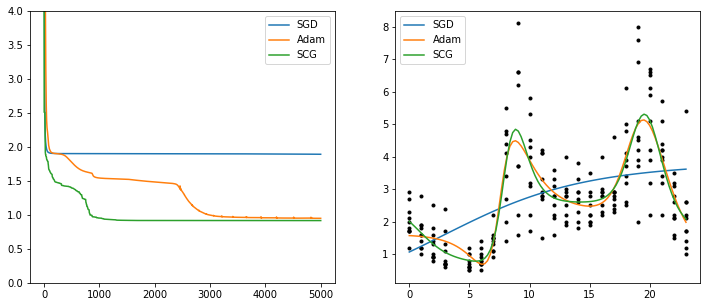

In [94]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(result_sgd['ftrace'], label='SGD')
plt.plot(result_adam['ftrace'], label='Adam')
plt.plot(result_scg['ftrace'], label='SCG')
plt.legend()
plt.ylim(0, 4)

plt.subplot(1, 2, 2)
plt.plot(X, T, 'k.')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
plt.plot(xs, network(result_sgd['w'], n_inputs, n_hiddens, n_outputs, xs), label='SGD')
plt.plot(xs, network(result_adam['w'], n_inputs, n_hiddens, n_outputs, xs), label='Adam')
plt.plot(xs, network(result_scg['w'], n_inputs, n_hiddens, n_outputs, xs), label='SCG')
plt.legend();

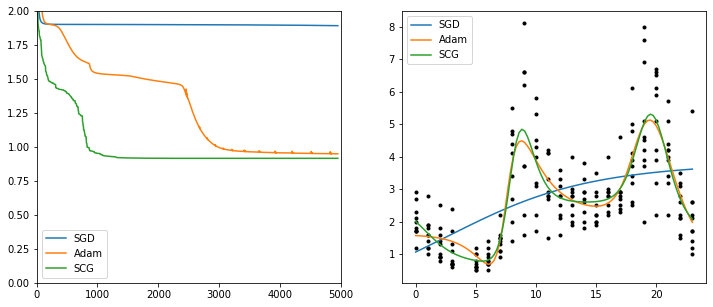

In [95]:
plt.figure(figsize=(12, 5))
for step in range(0, n_I, n_I // 100):
    #time.sleep(0.01) # sleep 2 seconds
    plt.clf()
 
    plt.subplot(1, 2, 1)
    plt.plot(result_sgd['ftrace'][:step], label='SGD')
    plt.plot(result_adam['ftrace'][:step], label='Adam')
    plt.plot(result_scg['ftrace'][:step], label='SCG')
    plt.xlim(0, n_I)
    plt.legend()
    plt.ylim(0, 2)

    plt.subplot(1, 2, 2)
    plt.plot(X, T, 'k.')
    xs = np.linspace(0, 23, 100).reshape((-1, 1))
    plt.plot(xs, network(result_sgd['wtrace'][step], n_inputs, n_hiddens, n_outputs, xs), label='SGD')
    plt.plot(xs, network(result_adam['wtrace'][step], n_inputs, n_hiddens, n_outputs, xs), label='Adam')
    plt.plot(xs, network(result_scg['wtrace'][step], n_inputs, n_hiddens, n_outputs, xs), label='SCG')
    plt.legend();

    ipd.clear_output(wait=True)
    ipd.display(plt.gcf())
ipd.clear_output(wait=True)

Play with changing
*  n_hiddens
*  n_I
*  learning rates

Helpful resources:

* [Backpropagation tutorial by Google](https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/)
* [What is backpropagation really doing? | Deep learning, chapter 3](https://www.youtube.com/watch?v=Ilg3gGewQ5U)